# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [2]:
websites = pd.read_csv('C:\\Users\\Ale\\Documents\\IronHack\\Git\\salidas\\website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [3]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# What are the data types?
websites.dtypes
# websites[['WHOIS_COUNTRY', 'WHOIS_STATEPRO','WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'CHARSET', 'SERVER']]
# websites.CHARSET.unique()

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
# Which columns contain the features of the websites?
features = websites.drop(columns=['URL', 'Type'])
features


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0


In [6]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
target = websites['Type']
target.value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [7]:
# 0 for bening 1 for maliciuos websites

In [10]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
#  = pd.get_dummies(websites, columns=categorical_columns, drop_first=True)
websites[categorical_columns]

,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO
0,iso-8859-1,nginx,NaN,NaN
1,UTF-8,Apache/2.4.10,NaN,NaN
2,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN
3,ISO-8859-1,nginx,US,AK
4,UTF-8,NaN,US,TX
...,...,...,...,...
1776,UTF-8,Apache,ES,Barcelona
1777,UTF-8,Apache,ES,Barcelona
1778,utf-8,Apache/2.2.16 (Debian),US,FL
1779,ISO-8859-1,cloudflare-nginx,US,CA


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

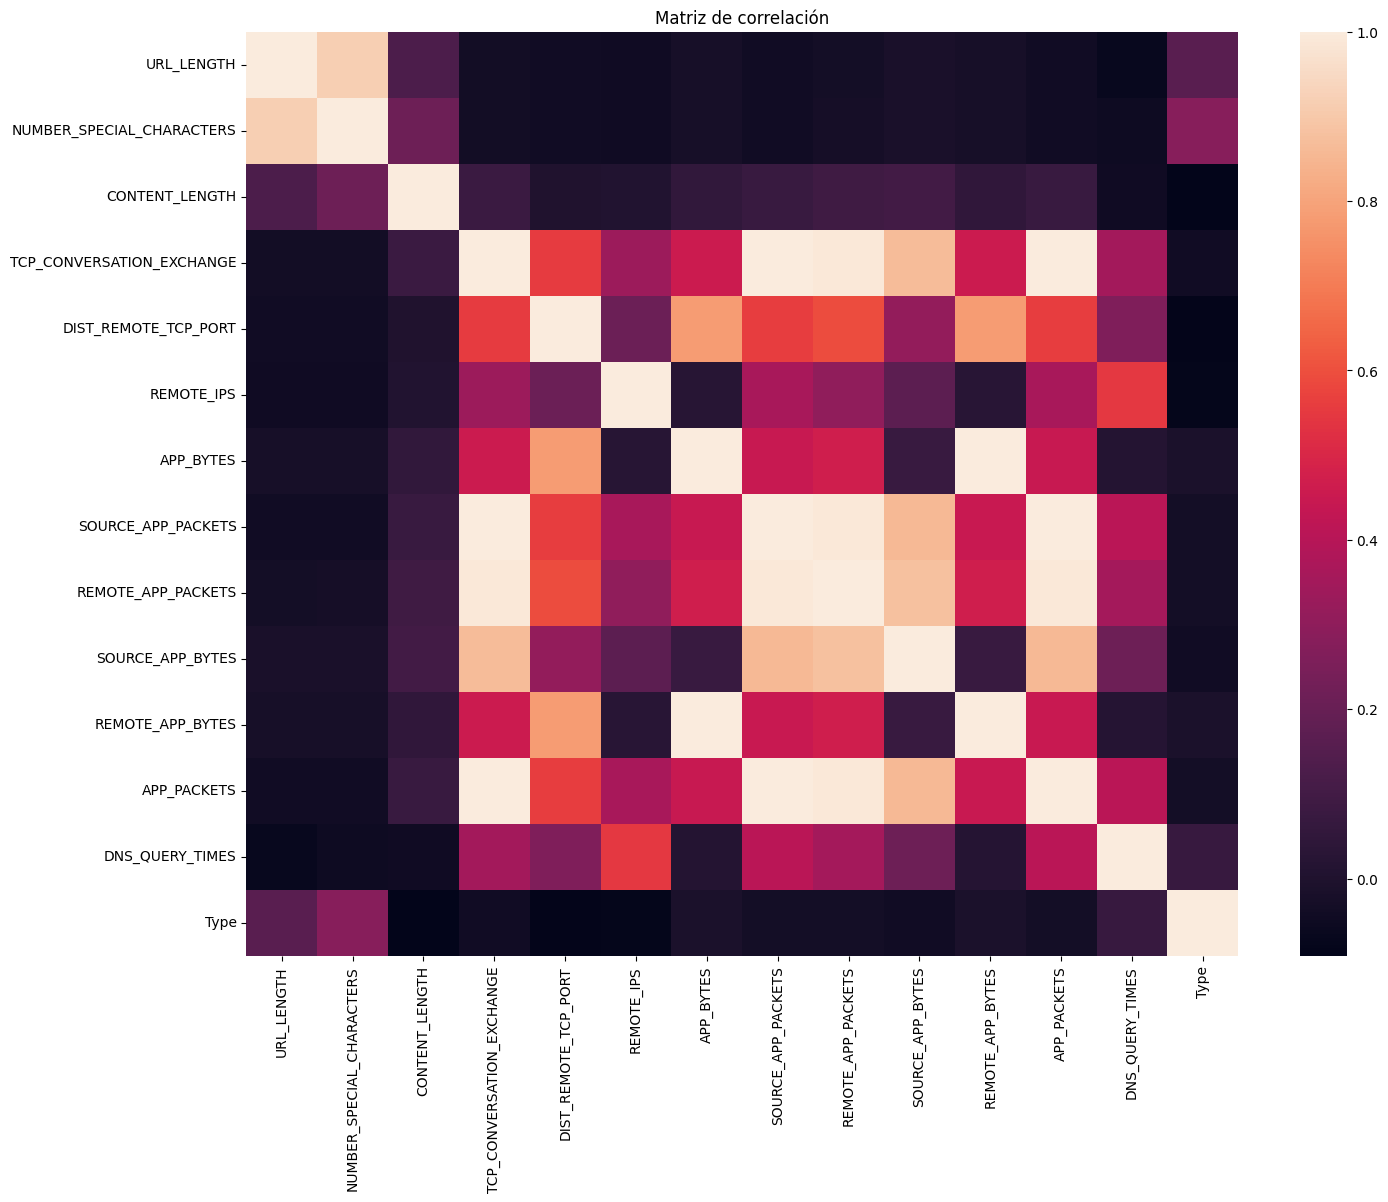

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


In [11]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

col_num = websites.select_dtypes(include=['float64', 'int64']).columns
matriz_corr = websites[col_num].corr()

plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr)
plt.title('Matriz de correlación')
plt.show()
matriz_corr

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [10]:
! pip install xgboost

In [11]:
import xgboost as xgb
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type
X

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,...,False,False,False,False,False,False,False,False,False,False
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,False,False,False,False,False,False,False,False,False,False
2,16,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,False,False,False,False,False
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,...,False,False,False,False,False,False,False,False,False,False
1777,198,17,NaN,0,0,0,0,0,2,124,...,False,False,False,False,False,False,False,False,False,False
1778,201,34,8904.0,83,2,6,6631,87,89,132181,...,False,False,False,False,False,False,False,False,False,False
1779,234,34,NaN,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
model = xgb.XGBClassifier()
model.fit(X,y)

ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
sort_idx = xgb.feature_importances_.argsort()

In [ ]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [13]:
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,...,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,M0_109,16,7,263.0,10/10/2015 18:21,NaN,7,0,2,700,...,False,False,False,False,False,False,False,False,False,False
1,B0_2314,16,6,15087.0,NaN,NaN,17,7,4,1230,...,False,False,False,False,False,False,False,False,False,False
2,B0_911,16,6,324.0,NaN,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,B0_113,17,6,162.0,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,...,False,False,False,False,False,False,False,False,False,False
4,B0_403,17,6,124140.0,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,NaN,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1777,M4_41,198,17,NaN,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1778,B0_162,201,34,8904.0,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,...,False,False,False,False,False,False,False,False,False,False
1779,B0_1152,234,34,NaN,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Your code here
# Vemos que columnas tienen alta colienalidad
alta_corr = matriz_corr.abs()
np.fill_diagonal(alta_corr.values, 0)  # Excluir la correlación consigo mismas
high_corr_pairs = [(col, alta_corr[col].idxmax(), alta_corr[col].max()) for col in alta_corr.columns]

high_corr_pairs.sort(key=lambda x: x[2], reverse=True)
high_corr_pairs[:4]

[('SOURCE_APP_PACKETS', 'APP_PACKETS', 1.0),
 ('APP_PACKETS', 'SOURCE_APP_PACKETS', 1.0),
 ('APP_BYTES', 'REMOTE_APP_BYTES', 0.9999919769069511),
 ('REMOTE_APP_BYTES', 'APP_BYTES', 0.9999919769069511)]

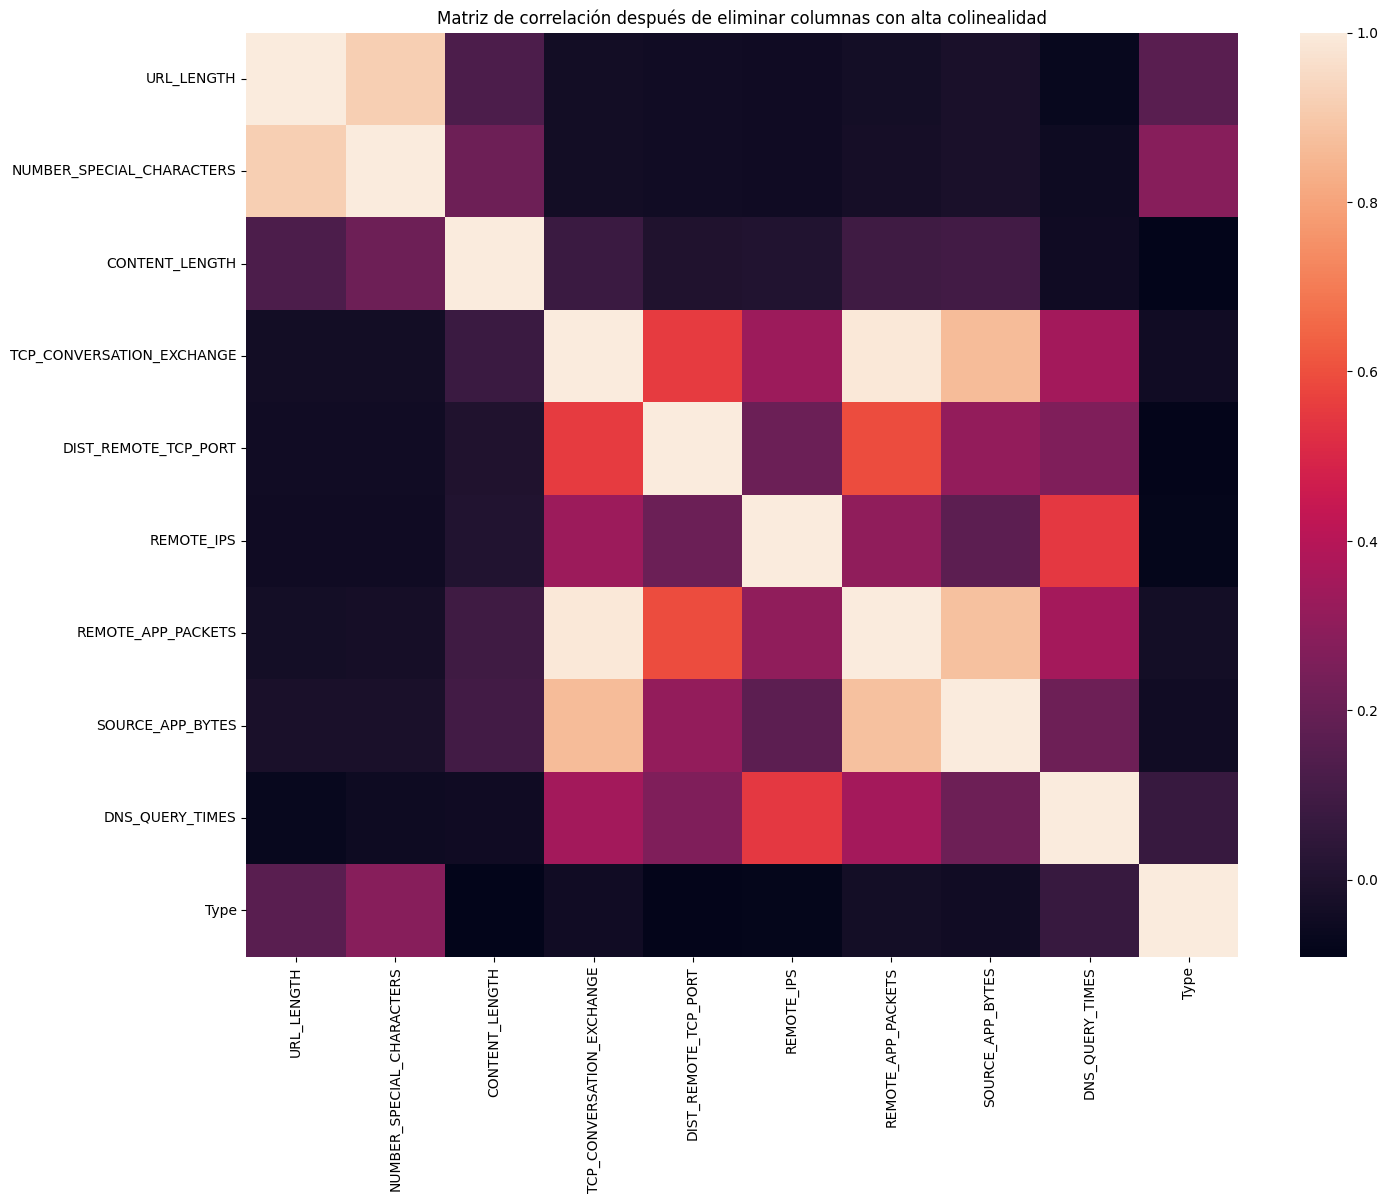

In [13]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
websites = websites.drop(['SOURCE_APP_PACKETS', 'APP_PACKETS', 'APP_BYTES', 'REMOTE_APP_BYTES'], axis=1)
col_num = websites.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(16, 12))
sns.heatmap(websites[col_num].corr())
plt.title('Matriz de correlación después de eliminar columnas con alta colinealidad')
plt.show()



# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [14]:
# Your code here
missing = websites.isna().sum()
missing[missing>0]

CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64

In [15]:
# Firts we will drop the columns with more than 50% of missing data
missing_values = websites.isnull().sum()
print("Valores faltantes por columna antes de la eliminación:")
print(missing_values[missing_values > 0])

threshold = 0.5 * len(websites)

# Eliminar columnas con más del 50% de valores faltantes
websites = websites.dropna(thresh=threshold, axis=1)
websites

Valores faltantes por columna antes de la eliminación:
CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,10,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,19,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,37,18784,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,62,129889,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,3,186,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,2,124,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,89,132181,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0.0,0


In [16]:
# Now we will drop the rows with missing data
websites = websites.dropna()



#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [17]:
# Examine missing values in each column
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [26]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US    513
CA     41
UK     16
AU     11
PA     10
JP      6
CH      5
IN      4
AT      4
SC      2
BS      2
UA      2
UY      2
CN      2
TR      1
UG      1
PH      1
IE      1
AE      1
BY      1
BE      1
NO      1
IT      1
KY      1
DE      1
IL      1
HK      1
SI      1
RU      1
NL      1
Name: count, dtype: int64

In [20]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])




C:\Users\Ale\AppData\Local\Temp\ipykernel_20816\4195794207.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])


In [21]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [22]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

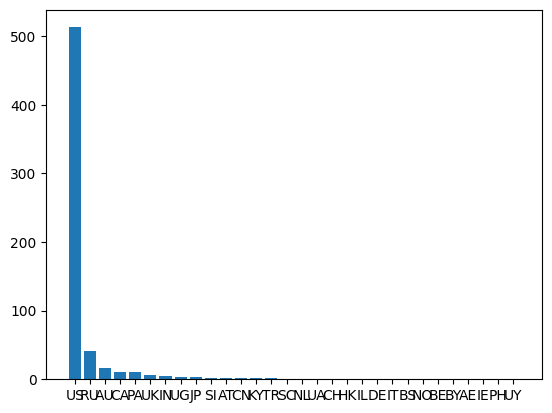

<Figure size 1500x1500 with 0 Axes>

In [24]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [38]:
# Your code here
websites.WHOIS_COUNTRY.value_counts()
top_10 = ['US', 'CA', 'UK', 'AU', 'PA', 'JP', 'CH', 'IN', 'AT', 'SC']
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10 else 'OTHER')


WHOIS_COUNTRY
US       513
CA        41
OTHER     24
UK        16
AU        11
PA        10
JP         6
CH         5
IN         4
AT         4
SC         2
Name: count, dtype: int64

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [39]:
# Your code here
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,37,18784,8.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,12,0,3,13,8559,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0.0,0
11,B0_1102,20,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0.0,0
16,M0_97,21,7,iso-8859-1,nginx,686.0,OTHER,6,0,2,9,1580,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,B0_2233,143,22,ISO-8859-1,AkamaiGHost,374.0,US,6,5,2,7,442,0.0,0
1762,B0_221,146,24,UTF-8,nginx,11833.0,US,29,20,8,33,3181,4.0,0
1774,B0_156,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,22,2,7,26,8161,8.0,0
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,89,132181,4.0,0


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [41]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [42]:
# Your code here
websites = websites.drop(['URL'], axis=1)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [43]:
# Your code here
websites.CHARSET.unique()

array(['ISO-8859-1', 'iso-8859-1', 'us-ascii', 'utf-8', 'UTF-8',
       'windows-1251'], dtype=object)

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [44]:
# Your code here
websites.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [45]:
# Count `SERVER` value counts here
websites['SERVER'] = websites['SERVER'].apply(lambda x: 'Microsoft' if 'Microsoft' in x else 'Apache' if 'Apache' in x else 'nginx' if 'nginx' in x else 'others')
websites.SERVER.unique()

array(['nginx', 'Apache', 'Microsoft', 'others'], dtype=object)

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [47]:
# Your code here
website_dummy = pd.get_dummies(websites, drop_first=True)
website_dummy


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CH,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_SC,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,6,162.0,31,22,3,37,18784,8.0,0,...,False,False,False,False,False,False,False,False,False,True
6,18,6,345.0,12,0,3,13,8559,2.0,0,...,False,False,False,False,False,False,False,False,False,True
7,19,6,324.0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
11,20,6,324.0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
16,21,7,686.0,6,0,2,9,1580,2.0,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,143,22,374.0,6,5,2,7,442,0.0,0,...,False,False,False,False,False,False,False,False,False,True
1762,146,24,11833.0,29,20,8,33,3181,4.0,0,...,False,False,False,False,False,False,False,False,False,True
1774,183,29,4890.0,22,2,7,26,8161,8.0,0,...,False,False,False,False,False,False,False,False,False,True
1778,201,34,8904.0,83,2,6,89,132181,4.0,0,...,False,False,False,False,False,False,False,False,False,True


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [52]:
# Your code here
website_dummy.dtypes


URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
SERVER_Microsoft                bool
SERVER_nginx                    bool
SERVER_others                   bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CH                bool
WHOIS_COUNTRY_IN                bool
WHOIS_COUNTRY_JP                bool
WHOIS_COUNTRY_OTHER             bool
WHOIS_COUNTRY_PA                bool
WHOIS_COUNTRY_SC                bool
WHOIS_COUNTRY_UK                bool
W

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [53]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [54]:
# Your code here:
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression()

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [56]:
# Your code here:
logistic_model.fit(X_train, y_train)

c:\Users\Ale\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [57]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

y_pred = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[114   3]
 [  6   5]]
Accuracy Score: 0.9296875


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.
Una precisión de maás del 90% es muy alta. Funciona bien.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [59]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [60]:
# Your code here:
y_prob = tree_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[117   0]
 [ 11   0]]
Accuracy Score: 0.9140625


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [62]:
# Your code here:
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)


y_prob = tree_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[113   4]
 [  9   2]]
Accuracy Score: 0.8984375


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:
Empeora la situación.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: